# <center>Laboratorium 12<br>Metody Numeryczne</center>    

In [2]:
import main
import numpy as np
import scipy
import scipy.optimize
import matplotlib
import matplotlib.pyplot as plt
import math


Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań różniczkowych
zwyczajnych. Będziemy rozpatrywać równania różniczkowe postaci
$$\dot{x}(t) = f(x(t), t)$$
gdzie:

$x(t) \in \mathbb{R}^n$,

$t \ge 0$ 


z warunkiem początkowym $x(0) = x0$

Jest to tak zwany problem początkowy (problem Cauchy’ego) dla równań różniczkowych zwyczajnych.

**Zadanie 1.**  
Zaimplementuj metodę *solve_euler* z main.py 


***Zadanie 2.*** 

Rozwiąż równanie 
$
\dot{x}(t)=\frac{x+t}{x-t}
$, 

$x(0)=1$ (równanie to posiada rozwiązanie dokładne: 
$x(t)=t+\sqrt{1+2t^2}$). 

Narysuj wykres podanego rozwiązania dokładnego oraz uzyskanych rozwiązań numerycznych.

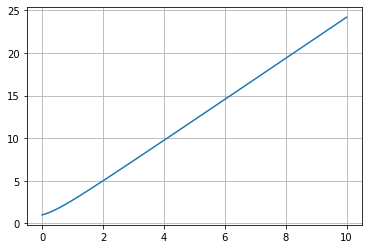

Text(0.5, 1.0, 'Wykres funkcji obliczonej za pomocą metody Eulera.')

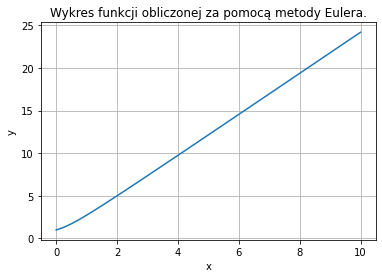

In [2]:
function = lambda t : t + np.sqrt(1 + 2*t**2)
t = np.linspace(0, 10, 1000)
dfun = lambda t, x : (x+t)/(x-t)

plt.plot(t, function(t))
plt.grid()
plt.show()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Wykres funkcji dokładnej.")

plt.plot(t, main.solve_euler(dfun, t, 1))
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Wykres funkcji obliczonej za pomocą metody Eulera.")



***Zadanie 3.*** 

Rozwiąż układ równań różniczkowych: 
$$
\begin{array}{l}
\dot{x_1}(t)={x_3}(t)\\
\dot{x_2}(t)={x_4}(t)\\
\dot{x_3}(t)=-\frac{x_1(t)}{{(x_1(t)^2+x_2(t)^2)}^{\frac{3}{2}}}\\
\dot{x_4}(t)=-\frac{x_2(t)}{{(x_1(t)^2+x_2(t)^2)}^{\frac{3}{2}}}
\end{array}
$$
      
z warunkiem początkowym $x(0)=[1,0,0,1]^T$.
    
Dla takiego warunku początkowego układ ten ma rozwiązanie szczególne 
$$
x(t)=\left[\begin{matrix}
cos(t)\\
sin(t)\\
-sin(t)\\
cos(t)
\end{matrix}\right].
$$  

Narysuj wykres podanego rozwiązania szczegółowego oraz uzyskanych rozwiązań numerycznych.

No handles with labels found to put in legend.


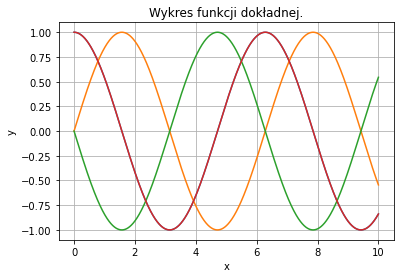

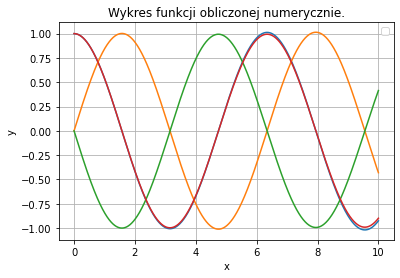

In [7]:
function = [lambda t : np.cos(t), lambda t : np.sin(t), lambda t : -1 * np.sin(t), lambda t : np.cos(t)]
t = np.linspace(0, 10, 10000)
y0 = [1,0,0,1]

def dfun2(x):
    y = []
    y.append(x[2])
    y.append(x[3])
    y.append(-1 * (x[0]) / np.sqrt((x[0]**2 + x[1]**2)**3))
    y.append(-1 * (x[1]) / np.sqrt((x[0]**2 + x[1]**2)**3))
    return np.array(y)


plt.figure()
for x in range(0, len(function)):
    plt.plot(t, function[x](t), label = 'x' + str(x+1))
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Wykres funkcji dokładnej.")

plt.figure()
res = main.solve_euler(dfun2, t, y0)
for r in res:
    plt.plot(t,r)
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Wykres funkcji obliczonej numerycznie.")
plt.legend()

Metoda numeryczna przypomina wykres funkcji dokładnej z pewnym błędem. Jednak, żeby osiągnąć taki wynik koniecznym było zmniejszenie kroku z 0.01 do 0.001.
W przeciwnym wypadku, przy korzystaniu z kroku takiego jak w zadaniu 2. funkcje bardzo szybko się "rozjeżdżały", w fazie oraz amplitudzie.

***Zadanie 4.*** 

Rozwiąż układ równań $\dot{x}(t)=\mathbf{A}x(t)$, gdzie macierz 
$
\mathbf{A}$ dana jest wzorem:  
$$
\mathbf{A}=\left[\begin{matrix}
-667 & 333 \\
 666 & -334
\end{matrix}\right]
$$

z warynkiem początkowym $x(0)=[0, 3]^T$

Narysuj wykres uzyskanych rozwiązań numerycznych. Jakie jest rozwiązanie dokładne tego równania?

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Wykres funkcji dokładnej.')

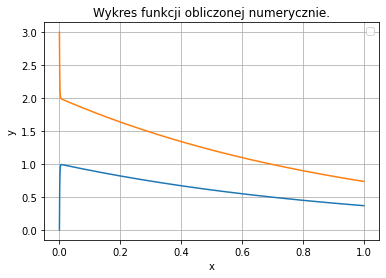

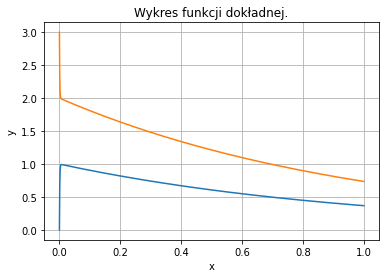

In [3]:
def dfun3(x):
    y = []
    y.append(-667 * x[0] + 333 * x[1])
    y.append(666 * x[0] - 334 * x[1])
    return y

t = np.linspace(0, 1, 10000)
y0 = [0,3]

plt.figure()
res = main.solve_euler(dfun3, t, y0)
for r in res:
    plt.plot(t,r)
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Wykres funkcji obliczonej numerycznie.")
plt.legend()

function = [lambda t : np.exp(-t) - np.exp(-1000*t), lambda t : np.exp(-1000*t) + 2*np.exp(-t)]
plt.figure()
for x in range(0, len(function)):
    plt.plot(t, function[x](t), label = 'x' + str(x+1))
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Wykres funkcji dokładnej.")

Dokładne rozwiazanie równania:

x1 =e^(-t) - e^(-1000t),

x2 =e^(-1000t)+2e^(-t)

***Zadanie 4.*** 

Orbita Arenstorfa. Jest to przykład z astronomii opisujący zredukowany problem trzech ciał. Rozważa się dwa ciała o masach $\mu$ i $\mu'=1-\mu$, poruszające się w ruchu kołowym na jednej płaszczyźnie oraz ciało o pomijalnej masie poruszające się między nimi w tej samej płaszczyźnie. Dany jest układ równań różniczkowych:
$$
\begin{array}{l}
\dot{x_1}(t)={x_2}(t)\\
\dot{x_2}(t)={x_1}(t)+2x_4(t)-\mu'\frac{x_1+\mu}{D_1}-\mu\frac{x_1-\mu'}{D_2}\\
\dot{x_3}(t)=x_4(t)\\
\dot{x_4}(t)=x_3(t)-2x_2(t)-\mu'\frac{x_3(t)}{D_1}
-\mu\frac{x_3(t)}{D_2}\end{array}.
$$

gdzie
$$
\begin{array}{l}
D_1=((x_1(t)+\mu)^2+{x_3}^2(t))^\frac{3}{2}\\
D_2=((x_1(t)-\mu')^2+{x_3}^2(t))^\frac{3}{2}\\
\mu=0.012277471\end{array}.
$$

Zmienne $x_1$ i $x_3$ odpowiadają za współrzędne na płaszczyźnie trzeciego ciała zaś $x_2$ i $x_4$
są odpowiednio prędkościami. Warto zwrócić uwagę, że zarówno czas jak i masa zostały
w równaniach przeskalowane, i nie mają bezpośredniej interpretacji fizycznej, należy je
traktować jako zmienne bezwymiarowe. Dla pewnych warunków początkowych i czasu
symulacji
$$
\begin{array}{l}
x_1(0) = 0.994\\
x_2(0) = 0\\
x_3(0) = 0\\
x_4(0) = − 2.00158510637908252240537862224\\
T = 17.0652165601579625588917206249.\end{array}
$$
dokładne rozwiązanie tych równań jest okresowe ($x(0)=x(T)$).

Narysuj wykres uzyskanych rozwiązań numerycznych.

No handles with labels found to put in legend.


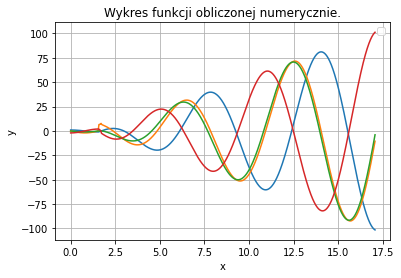

In [4]:
def dfun4(x):
    fi = 0.012277471
    fit = 1 - fi
    D1 = np.sqrt(((x[0] + fi)**2 +x[2]**2)**3)
    D2 = np.sqrt(((x[0] + fit)**2 +x[2]**2)**3)
    y = []
    y.append(x[1])
    y.append(x[0] + 2*x[3] - fit*(x[0]+fi)/D1 - fi*(x[0] - fit)/D2)
    y.append(x[3])
    y.append(x[2] - 2*x[1] - fit*x[2]/D1 - fi*x[2]/D2)
    return y

y0 = [0.994, 0, 0, -2.00158510637908252240537862224]
T = 17.0652165601579625588917206249

t_span = np.linspace(0,T,10000)

res = main.solve_euler(dfun4, t_span, y0)

for r in res:
    plt.plot(t_span,r)
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Wykres funkcji obliczonej numerycznie.")
plt.legend()


Laboratoria pozwoliły zapoznać się z metodą numeryczną rozwiązywania układów równań różniczkowych. Metoda Eulera jest metodą bardzo prostą w implementacji, jednak jej prostota rzutuje też na wyniki końcowe. Żeby osiągnąć zadowalające przybliżenie jesteśmy zmuszeni użyć bardzo małego kroku, co rzutuje na złożoność obliczeniową programu. Metoda ta jest wprawdzie bardzo efektywna jeśli mamy do czynienia z raczej prostymi funkcjami, tak w przypadku obliczeń bardziej złożonych, lub opracowywania procesów w których kluczowym jest osiągnięcie bardzo dużej dokładności, metoda Eulera może nie być najlepszym wyborem.

**Bibliografia**

1. J. C. Butcher. Numerical Methods for Ordinary Differential Equations. John Wiley and Sons, Ltd., 2003.
2. Z. Fortuna, B. Macukow, and J. Wąsowski. Metody numeryczne. WNT Warszawa, 1982.
3. E. Hairer, S.P. Nørsett, and G. Wanner. Solving Ordinary Differential Equations: I Nonstiff problems. Springer, 2 edition, 2000.
4. W. Mitkowski. Równania macierzowe i ich zastosowania. Wydawnictwa AGH, Kraków,2 edition, 2007.
5. A. Ralston. Wstęp do analizy numerycznej. PWN, Warszawa, 1965.
6. L. F. Shampine, I. Gladwell, and S. Thompson. Solving ODEs with MATLAB. Cambridge University Press, 2003.
7. Stoer, J., Burlirsch, R., 1980: Wstêp do metod numerycznych, tom 2. PWN Warszawa.
